In [ ]:
#First, make sure the notebook is aware of the workshop data sets
!git clone https://github.com/icomse/8th_workshop_MachineLearning.git
import os
os.chdir('8th_workshop_MachineLearning/data')

## Regression as machine learning

Let's start with the simplest models we can! Plain old fitting to a line; the simplest model there can be. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [5]:
# the names in sklearn tend to be pretty long, so we will import the individual
# objects rather than the whole library 

from sklearn.linear_model import LinearRegression

### Let's read in some data

This is some artificial data we will be playing around with to illustrate some important concepts.

In [7]:
dlin = pd.read_csv('linmod.csv')

What does this data look like? Inspect directly and plot.

In [8]:
dlin.head()

,inputs,outputs
0,8.894,16.107
1,8.691,16.509
2,11.080,16.941
3,16.344,17.382
4,13.662,17.831


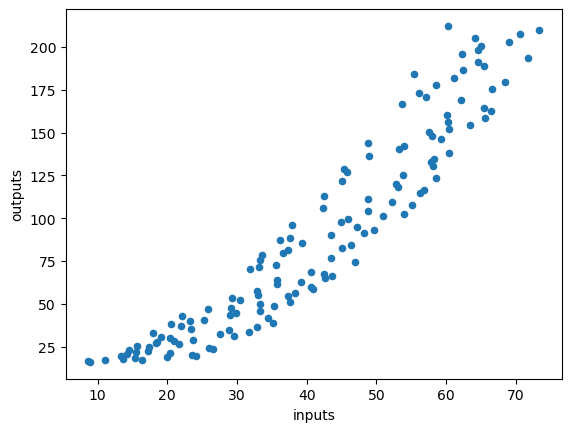

In [9]:
dlin.plot(x='inputs',y='outputs',kind='scatter')
plt.show()

Quick question: Why don't you see many graphs inspecting the data with machine learning studies?

In [ ]:
Answer: There are many different 

Now, let's train a linear model with the data! First, create the model. It starts out as just an empty Python object that we need to fill provide data to.

In [ ]:
linmodel = LinearRegression()

Now look up the documentation as to what to do to fit the model. When you fit it, what do you get back? 

NOTE: `LinearRegression` expects that that the input X is a 2D arrray, of size `[n_features, n_samples]`, because it is designed to handle the general case that you are doing multiple variable linear regression. So if you pass in a 1D array, it will error. Read the error message you get carefully for a quick fix.

**Hacking**: Read the documentation and fit the model!

OK, you have a model. We next want to plot the prediction of the model and the points on the same plot?

In [ ]:
xvals = np.linspace(10,70,100)
ypred = linmodel.predict(xvals.reshape(-1,1))  # use this to apply the model
plt.plot(xvals,ypred,c='k')
plt.scatter(X,Y)
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.show()

What methods does the `LinearRegression` have? What information can you get from it?  What are the parameters of a 1D linear regression?  What is a measure of how good the model is?

In [ ]:
linmodel?

Specifically, let's look at:

In [ ]:
print(linmodel.intercept_)
print(linmodel.coef_)
print(linmodel.score(X,Y))  # in this case, the score gives the R^2.

Let's play around with (over)fitting!  There's a little bit of curvature - in the data; maybe we should try a polynomial fit?

Before we go off and do more complicated models, let's actually just use a **subset** of the data set to train. Then, if we have reserved some data, we can test afterwards if our model does a good job fitting all of the data, or specifically fit the data we select.  There are tools doing this type of split!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

We make a polynomial fit using sklearn by taking powers of the input features.  `scikit-learn` has a function for this.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

To use it, you create a `PolynomialFeatures` object of the degree you are interested in, then take the powers of the data using the fit_transform method of `PolynomialFeatures`. See example (you will have to supply your own X, which is the same input as `LinearRegression.fit` takes.

In [ ]:
pf = PolynomialFeatures(degree=2)
pX_train = pf.fit_transform(X_train)

In [ ]:
print(X_train[:5])
print(pX_train[:5])

it's a degree $\times$ n_data array; with each column the input data to power $n$.

Now, lets see how the model fits the data.  Inspect the model parameters and the $R^2$, and plot the fit and the curve.

In [ ]:
linmodel.fit(pX_train,Y_train)
print(linmodel.intercept_)
print(linmodel.coef_)
print('R^2 (train) =', linmodel.score(pX_train,Y_train))

In [ ]:
xvals = np.linspace(10,70,100)
px = pf.fit_transform(xvals.reshape(-1,1))
ypredict = linmodel.predict(px)
plt.plot(xvals,ypredict,c='k')
plt.scatter(X_train,Y_train)
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.show()

Now test the model on the test set.

In [ ]:
pX = pf.fit_transform(X_test)
plt.plot(xvals,ypredict,c='k')
plt.scatter(X_test,Y_test)
plt.xlabel('inputs')
plt.ylabel('outputs')
print('R^2 =', linmodel.score(pX,Y_test))

Remember, it's the TESTING MSE (or $R^2$) that we want to minimize, not the training MSE.  If the training MSE is low, but the testing is high, then the model is overfit.  

**HACKING TIME**: Now, go back and try a higher polynomial degree. Note that polynomial fitting is not very numerically stable, so if you fit to too many points, then you start to have problems.  What problems do you have?

Can you plot $R^2$ (i.e. linmodel.score) for the test and training set versus polynomial degree?  What do you see?

In [ ]:
pf = PolynomialFeatures(degree=4) 
pX_train = pf.fit_transform(X_train) # transform the features into a x^0 . . . x^15
linmodel.fit(pX_train,Y_train) # train the model on the data
print('R^2 (train) =', linmodel.score(pX_train,Y_train))
pxvals = pf.fit_transform(xvals.reshape(-1,1)) # generate the polynomial input data
ypredict = linmodel.predict(pxvals) # predict the curve of the model.
plt.plot(xvals,ypredict,c='k') 
plt.scatter(X_test,Y_test,label='test',alpha=0.5)
plt.scatter(X_train,Y_train,label='train',alpha=0.5)
plt.legend()
pX_test = pf.fit_transform(X_test)  # what is the transformed test data, so we can compute the score
print('R^2 (test) =', linmodel.score(pX_test,Y_test)) # how well does the test data fit?

In [ ]:
R2test = list()
R2train = list()
ps = list()
for p in range(2,20):
    pf = PolynomialFeatures(degree=p)
    pX_train = pf.fit_transform(X_train)
    linmodel.fit(pX_train,Y_train)
    R2train.append(linmodel.score(pX_train,Y_train))
    pxvals = pf.fit_transform(xvals.reshape(-1,1)) # generate the polynomial input data
    ypredict = linmodel.predict(pxvals)
    pX_test = pf.fit_transform(X_test)
    R2test.append(linmodel.score(pX_test,Y_test))
    ps.append(p)

In [ ]:
plt.plot(ps,R2test,label='test set')
plt.plot(ps,R2train,label='training set')
plt.xlabel('polynomial degree')
plt.ylabel('$R^2$')
plt.legend()
plt.show()

We see here what is observed more generally: the training set will get a bit better on the same data as the model gets more complex, whereas the test model gets worse as the trained model starts to overfit.

### Multilinear regression

That's well and good, but that is just one input.  Usually, we have LOTS of features and want to use all of them to make our model.

In [ ]:
cld=pd.read_csv('HCEPDB_100K_cleaned.csv') # change where it is
# (but first you might refresh yourself on what is contained
# we'll use a smaller sample to make it go faster, and to make the problem a bit harder.
cld = cld[cld['pce']!=0] # clean out the data where PCE = 0 (not obtained)
cld_sample = cld.sample(n=5000,random_state=123)

The basic principle (and code!) is the same as ordinary least squares.

In [ ]:
features = ['mass', 'voc', 'jsc', 'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha']
observable = 'pce'
X = cld_sample[features]
Y = cld_sample[observable]

In [ ]:
# now fit the model
linmodel = LinearRegression() 
linmodel.fit(X,Y)
linmodel.score(X,Y)

Now, there are more coefficients! One for each feature

In [ ]:
linmodel.coef_

Now make a test-train split. We'll reserve most of the data for testing (we want to make it harder to fit!)

In [ ]:
train, test = train_test_split(cld_sample, test_size=0.95)

One think to take into account, though. What if the data has different units, or is different types?  How will the coefficients change? 

We use data standardization or normalization to remove this effect of choice of units.  Now, it's not always the best thing to do.  If you have two variables that are the same units, it could be that the distances DO matter.  

Basically, what we are saying is that the only real information in the input data is how many standard deviations away from the mean it is - we don't care about the absolute mangitude.

Minimum, it makes sure that the model does not depend on the units used.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(cld_sample[features])
train_standardized = pd.DataFrame(data=scaler.transform(train[features]),columns=features)
test_standardized = pd.DataFrame(data=scaler.transform(test[features]),columns=features)
# stick back in the unscaled observables
test_standardized['pce']=test['pce'].values 
train_standardized['pce']=train['pce'].values

For lasso and ridge regression we will look at soon, $R^2$ doesn't quite make sense, because the extra terms messes with calculation of the total sum of squares.  Instead, let's just look at the means squared error which depends just on the difference between predictions and the true data. 

Also, the coefficients of simple linear regression can take into account the change of units (it's the shrinkage term that makes the scale matter), but we'll do everything with standardized data to make it simpler. 

In [ ]:
from sklearn.metrics import mean_squared_error

## Part 1: Just getting it set up with more rigor: Multiple linear regression

In [ ]:
# train linear model 
MLR=LinearRegression()
MLR.fit(train[features],train[[observable]])

# make predictions on test and train set 
trainpred=MLR.predict(train[features])
testpred=MLR.predict(test[features])

#make parity plot 
plt.figure(figsize=(7,7))
plt.scatter(test[observable],testpred,color='r', label='Test')
plt.scatter(train[observable],trainpred, label='Training')
plt.plot(lw=4,color='black')
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

#calculate the test and train error
print("Train error",mean_squared_error(train[observable],trainpred))
print("Test error",mean_squared_error(test[observable],testpred))
print(MLR.coef_)

## Part 2: Ridge Regression (same data as Part 1)

* The ridge coefficients minimize $RSS + \lambda \sum_{j=1}^{p}\beta_j^2$
* There is an additional **penalty** in error for having large coefficients!
* Note: ISLR shows the tuning parameter as $\lambda$, but it is $\alpha$ in `sk-learn`
* Goal here: train models as a function of the regularization parameter 
* The X's **must** be be standardized for ridge regression to work correctly 
* Some methods in `sk_learn` also do automatic selection of shrinkage coefficient - you can try those out afterwards. 
* **For the next section, I suggest on your own you test out what normalization in ridge does, by executing the following code first WITHOUT and then WITH normalization** 

In [ ]:
from sklearn.linear_model import Ridge, Lasso

### Example of a single instance of ridge regression


In [ ]:
ridge=Ridge()
a=2.0
ridge.set_params(alpha=a)
ridge.fit(train_standardized[features],train_standardized[observable])

In [ ]:
train_predict = ridge.predict(train_standardized[features])
test_predict = ridge.predict(test_standardized[features])
print(mean_squared_error(train_standardized[observable],train_predict))
print(mean_squared_error(test_standardized[observable],test_predict))
print(ridge.coef_)

In [ ]:
ridge=Ridge()
a=8.0
ridge.set_params(alpha=a)
ridge.fit(train_standardized[features],train_standardized[observable])
train_predict = ridge.predict(train_standardized[features])
test_predict = ridge.predict(test_standardized[features])
print(mean_squared_error(train_standardized[observable],train_predict))
print(mean_squared_error(test_standardized[observable],test_predict))
print(ridge.coef_)

### Hyperparameters

$\alpha$ (or $\lambda$) is an example of a *hyperparameter*.  It's a variable that will change exactly what the model is doing.  The parameters of the models are the coefficients of the ridge regression; each choice of parameter gives a different model, but each choice of hyperparameters leads to a different model. Deep learning methods often have *many* hyperparameters. Tuning hyperparameters is a key part of building machine learning models.  So let's tune a hyperparameter!

**Hacking**: 
Vary $\alpha$ and see how the predictions and coefficients change.

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(train_standardized[observable],train_predict, label='Training')
plt.scatter(test_standardized[observable],test_predict,color='r', label='Test')
plt.plot([-2.5,10],[-2.5,10],lw=4,color='black')
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

### Example of searching the $\alpha$ ($\lambda$ in the notes) space in Ridge Regression

In [ ]:
Ridge?

In [ ]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

# do you know what is happening here? 
model = Ridge()

lambdas = np.logspace(-4,5,100)
# loop over lambda values (strength of regularization and find the errors)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(train_standardized[features],train_standardized[observable])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_standardized[observable],model.predict(
        train_standardized[features])))
    testerror.append(mean_squared_error(test_standardized[observable],model.predict(
        test_standardized[features])))

In [ ]:
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.ylim([0.01,1.5])
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc=1)
plt.title('error vs $\lambda$')
plt.show()

**Pause and discuss with a partner**: What is happening in these plots? 

The model is best (least overfit, best test MSE) at between $\lambda$ ($\alpha$) = $10^{-1}$ and $10$, specifically:

In [ ]:
lambdas[np.argmin(testerror)] #the lambda where the MSE is minimized

## Part 3: LASSO regression  (same data as Part 1)

* The LASSO improves over ridge regression by also providing a variable selection tool!
* The LASSO minimizer is $RSS + \lambda \sum_{j=1}^{p}\lvert\beta_j\rvert$

**Hacking time**: Plot the LASSO regression coefficients versus the magnitude of the shrinkage term, in the same way the ridge regression was done above, and find what values minimize the error.

What do you see differently about the graphs with LASSO instead of ridge regression?

Some of the coefficients are zero! Specifically:

In [ ]:
np.array(features)[coefs[np.argmin(testerror)]==0.0]  # need to convert to numpy array to use masking. 

So LASSO suggests that the best model would have just:

In [ ]:
np.array(features)[coefs[np.argmin(testerror)]!=0.0] 


### General linear models 

In the last class, we generated model based on the hypothesis that the $PCE$ of a candidate organic photovoltaic can be modeled as a contribution of the molecule's $mass$, $VOC$ and $E_{LUMO}$ values:  $PCE = \beta_0 + \beta_1\times mass + \beta_2\times VOC + \beta_3 \times E_{LUMO}$

The extension from multiple linear regression to general additive models is straightforward; it uses the same module `LinearRegression` module.

Let's first look at the residuals, versus the function, and then the residuals versus each of the variables, and see if there is any nonlinearity. Check the RSE of this model for future reference.

In [ ]:
train,test = train_test_split(cld, test_size=0.95)
features = ['mass', 'voc', 'e_lumo_alpha']
observable = 'pce'
train_X = train[features]
train_Y = train[['pce']]
test_X = test[features]
test_Y = test[['pce']]

In [ ]:
model = LinearRegression() 
model.fit(train_X,train_Y)

In [ ]:
predictions = model.predict(test_X)

In [ ]:
print("RSE =",mean_squared_error(test_Y,model.predict(test_X)))
plt.hexbin(test_Y,predictions-test_Y,cmap='hot')
plt.show()

What sort of nonlinear model do these plots suggest to try?  Try something, and compare $R^2$, RSE, and plot the residuals of the new model and the new model.

In [ ]:
# for complicated reasons, we have to add columns to the origina dataframe , not the cleaned dataframe 
# (basically, since the cleaned file is a slice of a dataframe, not a dataframe itself)
cld['voc2'] = cld['voc']**2  
cld['lumo2'] = cld['e_lumo_alpha']**2
cld['voc3'] = cld['voc']**3
cld['lumo3'] = cld['e_lumo_alpha']**3
cld = cld[cld['pce']!=0]  # clean out bad PCE's again. 

In [ ]:
train,test = train_test_split(cld, test_size=0.95)
features = ['mass','voc','voc2','voc3','e_lumo_alpha','lumo2','lumo3']
observable = 'pce'
train_X = train[features]
train_Y = train[['pce']]
test_X = test[features]
test_Y = test[['pce']]

model = LinearRegression() 
model.fit(train_X,train_Y)

print("RSE =",mean_squared_error(test_Y,model.predict(test_X)))
plt.hexbin(test_Y,model.predict(test_X)-test_Y,cmap='hot')
plt.show()

**Hacking time!**: What other general linear models, more complicated or simpler, can you test? How do you know if they are better?

Let's just add one cross-term to start.

## Classification 

### Logistic regression

Let's use a database of perovskite stability data patients to demonstrate logistic regression.  Perovskites have the general formula $ABX_3$, where $A$ and $B$ are cations and $X$ is an anion.

The variables are described as follows:
- ABX3: chemical formula of the compound
- exp_label: is it stable?  -1 is no, 1 is yes
- is_train: is it training data? -1 is no, 1 is yes
- nA: $n_A$, oxiation state of A
- nB: $n_B$, oxidation state of B
- nX: $n_X$, oxidations state of X
- rA (Ang):	$r_A$, ionic radius of A in Angstroms
- rB (Ang):	$r_B$, ionic radius of B in Angstroms
- rX (Ang):	$r_X$, ionic radius of X in Angstroms
- t: $t$, Goldschmidt tolerance factor, $\frac{r_A + r_X}{\sqrt{2}\left(r_B+r_X\right)}$
- tau: $\tau$, Bartel et al. tolerance factor $\frac{r_X}{r_B}-n_A\left(n_A - \frac{r_A/r_B}{\ln(r_A/r_B)}\right)$
- t_pred: Whether $t$ predicts it will be a perovskite, -1 is no, 1 is yes
- tau_pred:	Whether $\tau$ predicts it will be a perovskite ($\tau < 4.18$), -1 is no, 1 is yes
- tau_prob:	Probability that the compund it is a perovskite, according to $\tau$	

nA,nB,nX,rA,rB,rX are the features used for training.

Let's start by just looking at the means and standard deviations to see what it looks like.

In [ ]:
perov=pd.read_csv('perovskite_data.csv')
perov.head()

In [ ]:
# examine the input features which are not categorical. 
training_features = ['nA','nB','nX','rA (Ang)','rB (Ang)', 'rX (Ang)']
table1=np.mean(perov[training_features],axis=0)
table2=np.std(perov[training_features],axis=0)
df = pd.DataFrame(columns=['means','stds'])
df['means'] = table1
df['stds'] = table2
df

How much is training versus validation?

In [ ]:
perov['is_train'].hist()

`LogisticRegression` is in `sklearn.linear_model` and has many of the same inputs and outputs as `LinearRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Train a `LogisticRegression` model on the six inputs, and score it. (What is the score here? is it $R^2$)?

In [ ]:
perov_training = perov[perov['is_train']==1]
perov_testing =  perov[perov['is_train']==-1]
inputData = perov_training[['nA','nB','nX','rA (Ang)','rB (Ang)', 'rX (Ang)']]
outputData = (perov_training['exp_label']+1)/2  # rescale to 0,1, though it ends up not mattering.

inputData_test = perov_testing[['nA','nB','nX','rA (Ang)','rB (Ang)', 'rX (Ang)']]
outputData_test = (perov_testing['exp_label']+1)/2  # rescale to 0,1, though it ends up not mattering.

In [ ]:
logit1=LogisticRegression(solver='liblinear')
#we specify the liblinear solver to avoid a warning about not specifying
logit1.fit(inputData,outputData)
logit1.score(inputData,outputData)

In [ ]:
logit1.fit?

`Score` for logistic regression is just the fraction that are right.

In [ ]:
np.mean(logit1.predict(inputData)==outputData)

In [ ]:
logit1.score(inputData,outputData)

If we were to use NO inputs, just the outputs, we would predict that the percent that are stable would be the same as the percent in our population, or about 50/50

In [ ]:
np.mean(outputData)

So we are getting noticably better than random!

Let's look at the documentation for the function.

In [ ]:
LogisticRegression?

#### Model performance
What are the percent of peroskevites thatare correctly classified by this model?  

When we fail to predict correctly what are the possibilities?  For example, what are the true positive, true negative, false positive, and false negative rates?  Try using the `confusion_matrix` function of `sklearn.metrics`. How well does them model predict stability?

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(logit1.predict(inputData),outputData)
print(cm)

In [ ]:
confusion_matrix?

The format is: 
[[ True Negative  False Negative],
 [ False Positive True Positive]]

Look at coefficients.  Can you tell which ones are most important in predicting stability?  Why or why not? 

In [ ]:
logit1.coef_

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
inputDataScaled = scaler.fit_transform(inputData)
# just to inspect it better, transform it back into a pandas array
inputDataScaled = pd.DataFrame(data=inputDataScaled,columns = inputData.columns)

Let's compare them: 

In [ ]:
inputData.head()

In [ ]:
inputDataScaled.head()

**Hacking Time:** How does a prediction with normalized variables do versus one without normalized variables?

All coefficients are now relatively similar. Maybe $n_B$ is not important?

Question: Is all of the data linearly independent?

In [ ]:
features = ['nA','nB','rA (Ang)','rB (Ang)', 'rX (Ang)']
inputData = perov_training[features]
outputData = (perov_training['exp_label']+1)/2  # rescale to 0,1, though it ends up not mattering.
inputData_test = perov_testing[features]
outputData_test = (perov_testing['exp_label']+1)/2  # rescale to 0,1, though it ends up not mattering.


scaler = StandardScaler()
inputDataScaled = scaler.fit_transform(inputData)

# just to inspect it better, transform it back into a pandas array
inputDataScaled = pd.DataFrame(data=inputDataScaled,columns = inputData.columns)

In [ ]:
# we transform using the fit from the _training_ data
inputDataScaled_test = scaler.transform(inputData_test)  
inputDataScaled_test = pd.DataFrame(data=inputDataScaled_test, columns = inputData.columns)

In [ ]:
logit1=LogisticRegression(solver='liblinear')
#we specify the liblinear solver to avoid a warning about not specifying
logit1.fit(inputDataScaled,outputData)

In [ ]:
logit1.score(inputDataScaled_test,outputData_test)

In [ ]:
cm = confusion_matrix((perov_training['tau_pred']+1)/2,outputData)
print(cm)
cm = confusion_matrix((perov_testing['tau_pred']+1)/2,outputData_test)
print(cm)